In [1]:
import os
from konlpy.tag import Mecab
tokenizer = Mecab()#속도가 느려 형태소 분석기는 교체하였다
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = tokenizer.pos(line)
        res = []
        for w in words:
            res.append(w[0]+'__'+w[1].lower())    # 단어와 태그를 같이 태깅한다 
        tokenized.append(res)

In [2]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  


In [3]:
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")
print(model.wv.most_similar(positive=['사랑__nng']))
print('\n')
print(model.wv.most_similar(positive=['연극__nng']))
print('\n')
print(model.wv.most_similar(positive=['영화__nng']))
print('\n')
print(model.wv.most_similar(positive=['영화제__nng']))
print('\n')
print(model.wv.most_similar(positive=['가족__nng']))

[('만남__nng', 0.6491414308547974), ('키스__nng', 0.6291918158531189), ('우정__nng', 0.6056089401245117), ('고민__nng', 0.5845113396644592), ('경험__nng', 0.5794662237167358), ('기억__nng', 0.565150260925293), ('마음__nng', 0.5612759590148926), ('행복__nng', 0.5575109720230103), ('추억__nng', 0.5568584203720093), ('대면__nng', 0.5548210144042969)]


[('공연__nng', 0.7515076398849487), ('무용__nng', 0.7504252791404724), ('할리우드__nnp', 0.7349514961242676), ('뮤지컬__nng', 0.7233029007911682), ('미술__nng', 0.722792387008667), ('음악__nng', 0.712272584438324), ('오페라__nng', 0.7110645174980164), ('로드__nng', 0.7072425484657288), ('뮤직__nng', 0.6993142366409302), ('곡__nng', 0.6990588307380676)]


[('다큐멘터리__nng', 0.8376063704490662), ('작품__nng', 0.79071044921875), ('드라마__nng', 0.7266939878463745), ('영상__nng', 0.672942578792572), ('애니메이션__nng', 0.6316631436347961), ('이미지__nng', 0.6196650862693787), ('연기__nng', 0.6168617606163025), ('카메라__nng', 0.6135447025299072), ('코미디__nng', 0.6129645705223083), ('화면__nng', 0.612597346305847

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from collections import Counter
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = tokenizer.pos(line) 
            for word in tokenlist:
                if 'NNG' == word[1] or 'NNP' == word[1] or 'VV' == word[1]:#명사/동사
                    result.append((word[0]+'__'+word[1].lower())) 
#     return ' '.join(result)
    return result

In [5]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [6]:
#tfidf를 문서 두개에 적용하게 되면 빈도수 상위 기준 대부분이 df가 같다. 즉 idf가 같다.
#그러니 wordcount로 바꿔 비율을 구해보기로 했다.
word_counts_art = Counter(art)
word_counts_gen = Counter(gen)

#art에 등장한 단어 카운트를 gen에 등장한 카운트로 나눈다
word_ratios1 = {word: count / word_counts_gen[word] if word in word_counts_gen else 1 for word, count in word_counts_art.items() if count > 30}
sorted_word_ratios_art = sorted(word_ratios1.items(), key=lambda x: x[1], reverse=True)
#gen에 등장한 단어 카운트를 art에 등장한 카운트로 나눈다
word_ratios2 = {word: count / word_counts_art[word] if word in word_counts_art else 1 for word, count in word_counts_gen.items() if count > 30}
sorted_word_ratios_gen = sorted(word_ratios2.items(), key=lambda x: x[1], reverse=True)
print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(sorted_word_ratios_art[i][0], end=', ')
print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(sorted_word_ratios_gen[i][0], end=', ')


예술영화를 대표하는 단어들:
선화__nng, 피아니스트__nng, 북극__nng, 안나__nnp, 북한__nnp, 수현__nnp, 레오__nnp, 뮤지션__nnp, 황제__nng, 딘__nnp, 파리__nng, 수녀__nng, 로마__nng, 요괴__nng, 토미__nnp, 북__nng, 제인__nng, 준__nnp, 연주__nng, 피아노__nng, 지갑__nng, 마비__nng, 기적__nng, 천재__nng, 신부__nng, 콘서트__nng, 나치__nng, 공개__nng, 시인__nng, 샘__nnp, 떠오르__vv, 고양이__nng, 패션__nng, 필립__nnp, 미군__nng, 청춘__nng, 로맨스__nng, 외면__nng, 면__nng, 케빈__nnp, 병사__nng, 창__nng, 마리아__nnp, 진심__nng, 편지__nng, 용서__nng, 첫눈__nng, 아담__nng, 생애__nng, 고수__nng, 런던__nnp, 닮__vv, 공연__nng, 이탈리아__nnp, 영어__nng, 하루하루__nng, 유학__nng, 치열__nng, 선고__nng, 실화__nng, 러브__nng, 명성__nng, 흔들리__vv, 대원__nng, 이별__nng, 기도__nng, 카페__nng, 조금__nng, 사연__nng, 선언__nng, 무대__nng, 음악__nng, 연애__nng, 치유__nng, 꿈꾸__vv, 오페라__nng, 가난__nng, 흑인__nng, 청년__nng, 피터__nnp, 교통사고__nng, 최대__nng, 매혹__nng, 아픔__nng, 프랑스__nnp, 열정__nng, 대전__nng, 평온__nng, 아프리카__nnp, 모두__nng, 기자__nng, 아빠__nng, 평생__nng, 의__nng, 멤버__nng, 디__nng, 절친__nng, 노래__nng, 미국인__nng, 인생__nng, 

일반영화를 대표하는 단어들:
페스트__nnp, 인디__nnp, 포럼__nng, 지사__nng, 페스__nnp, 마사지__nng, 형

In [7]:
#단어중복문제를 거의 해결했으니 그대로 사용하도록 하겠다.
target_art, target_gen = [], []
for i in range(100):
    target_art.append(sorted_word_ratios_art[i][0])
for i in range(100):
    target_gen.append(sorted_word_ratios_gen[i][0])

In [8]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [9]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [10]:
total_counts = Counter('')
temp = []
for i in range(len(genre)):
    word_counts = Counter(genre[i])
    total_counts = total_counts + word_counts
    temp.append(word_counts)
temp2 =[]
for i in range(len(genre)):
    word_ratios = {word: count / total_counts[word] if word in total_counts else 1 for word, count in temp[i].items() if count > 30}
    if len(word_ratios)<15 :
        print(genre_name[i]+'은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.')
        word_ratios = {word: count / total_counts[word] if word in total_counts else 1 for word, count in temp[i].items() if count > 15}
    if len(word_ratios)<15 :
        print(genre_name[i]+'은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.')
        word_ratios = {word: count / total_counts[word] if word in total_counts else 1 for word, count in temp[i].items() if count > 5}
    sorted_word_ratios = sorted(word_ratios.items(), key=lambda x: x[1], reverse=True)
    temp2.append(sorted_word_ratios)

for tt in range(len(temp2)) :
    print('\n\n'+genre_name[tt], end=':')
    for i in range(min(30,len(temp2[tt]))) :
#         print(str(temp2[tt][i]), end=', ')
        print(str(temp2[tt][i][0]), end=', ')
    


공연은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
뮤지컬은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
뮤지컬은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
사극은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
서부극(웨스턴)은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
서부극(웨스턴)은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.


SF:우주선__nng, 외계__nng, 인류__nng, 생명체__nng, 행성__nng, 로봇__nng, 지구__nng, 과학자__nng, 시스템__nng, 박사__nng, 우주__nng, 미래__nng, 연구__nng, 능력__nng, 실험__nng, 음모__nng, 공격__nng, 개발__nng, 거대__nng, 인간__nng, 정부__nng, 살아남__vv, 임무__nng, 요원__nng, 위협__nng, 존재__nng, 발생__nng, 정체__nng, 위험__nng, 세계__nng, 

가족:아빠__nng, 엄마__nng, 학교__nng, 가족__nng, 딸__nng, 아들__nng, 아버지__nng, 마을__nng, 집__nng, 아이__nng, 살__vv, 찾__vv, 하__vv, 있__vv, 친구__nng, 영화제__nng, 되__vv, 날__nng, 국제__nng, 사랑__nng, 자신__nng, 시작__nng, 받__vv, 사람__nng, 

공연:비올레타__nnp, 레오노라__nnp, 실황__nng, 토스카__nng, 스카르피__nnp, 알프레도__nnp, 카바__nng, 백작__nng, 로지__nng, 오페라__nng, 공작__nng, 콘서트__nng, 왕자__nng, 여왕__nng, 노__nnp, 공연__nng, 공주__nng, 극장__nng, 무대__nng, 비극__nng, 파리__nng, 왕__nng, 코__nng, 시__nng, 부인__nng, 연인__nng, 여인__nng, 음악__nng, 돈__nng, 도시__nng, 

공포(호러):악령__nng, 호러__nnp,

In [11]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev


In [12]:
#장르별 키워드도 잘 뽑힌 것 처럼 보이니 그냥 사용하겠다.
attributes = []
for tt in range(len(temp2)) :
    attr = []
    for i in range(min(30,len(temp2[tt]))) :
        attr.append(temp2[tt][i][0])
    attributes.append(attr)

In [13]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [14]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

#마지막 히트맵 보기 힘들어서 그냥 다 구하는걸로 바꿨다
for i in range(len(genre_name)):
    for j in range(len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

/tmp/ipykernel_145/4273644845.py:22: RuntimeWarning: invalid value encountered in float_scalars
  return  (mean_X-mean_Y)/std_dev


In [15]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.0919561
SF 공연 0.06613646
SF 공포(호러) 0.3321353
SF 기타 0.5192165
SF 다큐멘터리 0.42089012
SF 드라마 0.6729084
SF 멜로로맨스 0.39653587
SF 뮤지컬 0.17483649
SF 미스터리 -0.08851015
SF 범죄 0.3126423
SF 사극 -0.39538062
SF 서부극(웨스턴) -0.20512621
SF 성인물(에로) 0.5362376
SF 스릴러 0.22498919
SF 애니메이션 0.7355587
SF 액션 0.5081481
SF 어드벤처 -0.33914563
SF 전쟁 -0.36391634
SF 코미디 0.36463827
SF 판타지 -0.13111632
가족 공연 0.19370976
가족 공포(호러) 0.37312278
가족 기타 0.42845204
가족 다큐멘터리 0.30825427
가족 드라마 0.6608764
가족 멜로로맨스 0.8131271
가족 뮤지컬 0.21108006
가족 미스터리 0.034299295
가족 범죄 0.35265943
가족 사극 -0.58250624
가족 서부극(웨스턴) -0.3367059
가족 성인물(에로) 0.9216588
가족 스릴러 0.29417738
가족 애니메이션 0.6689222
가족 액션 0.3427219
가족 어드벤처 -0.6637599
가족 전쟁 -0.10537362
가족 코미디 0.4810899
가족 판타지 -0.022901153
공연 공포(호러) 0.21079792
공연 기타 0.5388135
공연 다큐멘터리 0.3582698
공연 드라마 0.907799
공연 멜로로맨스 0.53267276
공연 뮤지컬 0.20303929
공연 미스터리 -0.14554156
공연 범죄 0.2021183
공연 사극 -0.48859185
공연 서부극(웨스턴) -0.29064324
공연 성인물(에로) 0.759478
공연 스릴러 0.12057184
공연 애니메이션 0.8929414
공연 액션 0.36409172
공연 어드벤처 -0.

<AxesSubplot:>

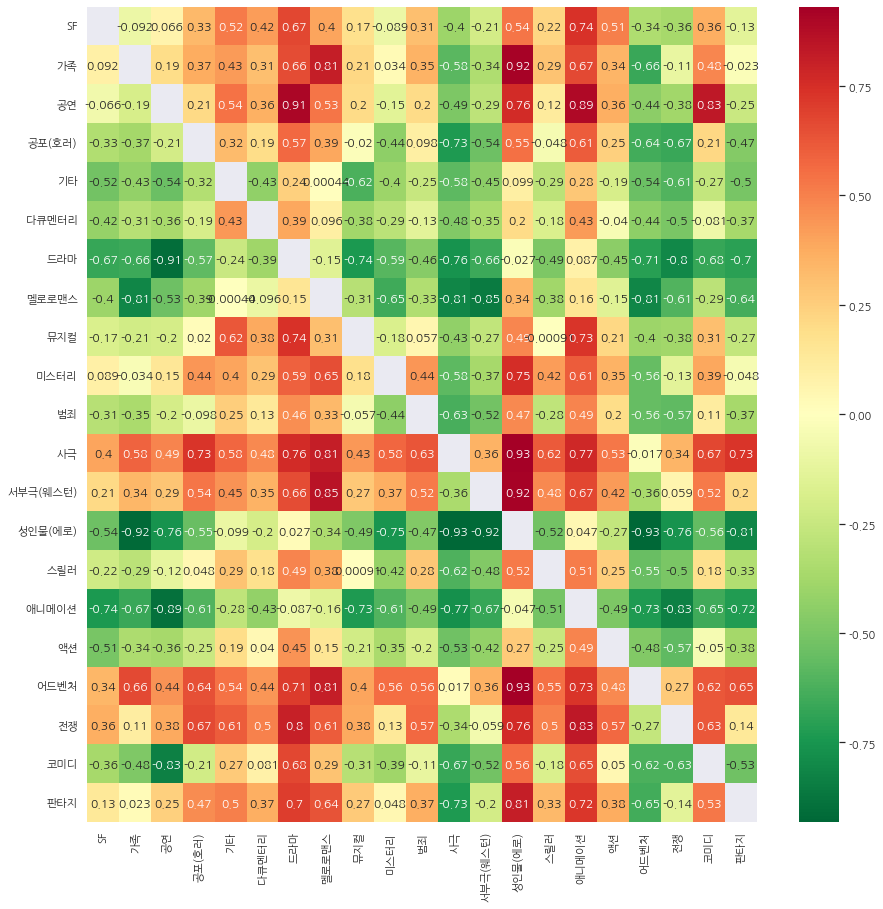

In [16]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt
np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 15))
ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax